## KNN implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 
## --> PCA (Library) without standardization
## --> KNN Library Code
## --> k = best value of k for maximum frequency

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

## reading .lan file

In [2]:
#import the package
from spectral import *

In [3]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 5\sample-data-master\92AV3C.lan')

In [4]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 5\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [5]:
data.shape

(145, 145, 220)

In [6]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

In [7]:
# data[0] won't work here
data[0,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]]], dtype=int16)

In [8]:
data[0,0,:]

array([[[3172, 4142, 4506, 4279, 4782, 5048, 5213, 5106, 5053, 4750,
         4816, 4769, 4610, 4805, 4828, 4861, 4767, 4624, 4549, 4463,
         4462, 4446, 4445, 4336, 4381, 4319, 4207, 4305, 4311, 3991,
         4168, 3942, 4061, 4365, 4318, 4252, 4869, 5284, 5055, 3591,
         5175, 5217, 5058, 4969, 4721, 4291, 4555, 4886, 4868, 4806,
         4783, 4811, 4709, 3903, 3795, 3715, 3359, 2130, 2269, 2480,
         3145, 3626, 4060, 4296, 4211, 4225, 4157, 4133, 4082, 4048,
         3935, 3843, 3784, 3642, 3271, 2707, 1707, 1564, 1838, 1719,
         2229, 2764, 2919, 2873, 2977, 2913, 3034, 3051, 3124, 3101,
         3033, 2713, 2740, 2947, 2706, 2834, 2856, 2683, 2400, 2229,
         1822, 1542, 1097, 1029, 1020, 1026, 1009, 1011, 1047, 1069,
         1100, 1122, 1259, 1365, 1261, 1374, 1630, 1851, 2028, 2130,
         2170, 2205, 2214, 2204, 2100, 2106, 2146, 2089, 2078, 2134,
         2127, 2074, 2057, 2045, 2003, 1999, 1959, 1924, 1883, 1843,
         1781, 1716, 1698, 1645, 1

In [9]:
# (0,0) pixel value of band 0
data[0,0,0]

3172

In [10]:
# (0,0) pixel value of band 1
data[0,0,1]

4142

In [11]:
# (0,0) pixel value of band 219
data[0,0,219]

1005

In [12]:
ground_truth = open_image('D:\Academic Thesis Papers\Thesis Report 5\sample-data-master\92AV3GT.GIS').read_band(0)

In [13]:
ground_truth

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [14]:
ground_truth_data = ground_truth
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

## Preparing Data by making the band number as features and pixel number as rows

In [15]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [16]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

In [17]:
np.array(dictionary['band_1'])

array([3172, 3348, 3687, ..., 3153, 3155, 3323], dtype=int16)

In [18]:
np.array(dictionary['band_1']).shape

(21025,)

In [19]:
np.array(dictionary['band_1']).reshape(145,145)

array([[3172, 3348, 3687, ..., 3341, 3170, 3172],
       [3344, 3515, 3518, ..., 3859, 3686, 3512],
       [3512, 3344, 3512, ..., 3341, 3344, 3510],
       ...,
       [3324, 2983, 2988, ..., 3332, 3498, 3156],
       [3161, 3495, 2988, ..., 3156, 3159, 3329],
       [2979, 2977, 2814, ..., 3153, 3155, 3323]], dtype=int16)

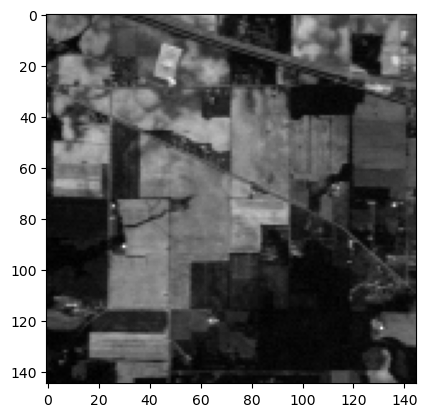

In [20]:
plt.imshow(np.array(dictionary['band_32']).reshape(145,145),cmap='gray')
plt.show()

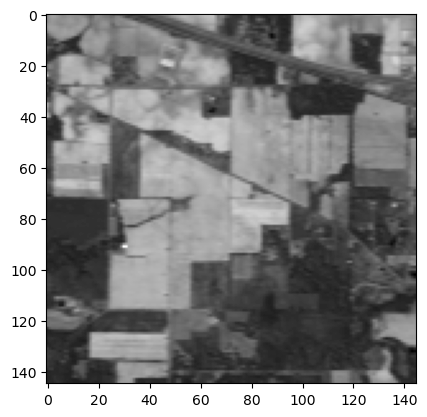

In [21]:
plt.imshow(np.array(dictionary['band_122']).reshape(145,145),cmap='gray')
plt.show()

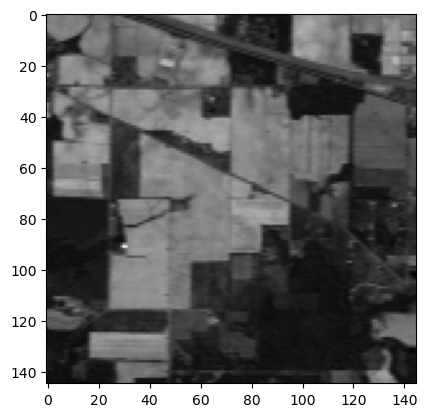

In [22]:
plt.imshow(np.array(dictionary['band_183']).reshape(145,145),cmap='gray')
plt.show()

## Preparing ground truth data as target data

In [23]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [24]:
ground_truth_data.shape

(145, 145)

In [25]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

So there are total 17 classes in this ground truth data

In [26]:
ground_truth_data.reshape(21025,1)

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [27]:
target = ground_truth_data.reshape(21025,1)
target

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [28]:
print(target.shape)
print(target.ndim)

(21025, 1)
2


but still, 'target' remains as 2D since it's shape is (21025,1). So we need 'target' to be 1D

In [29]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [30]:
print(target.shape)
print(target.ndim)

(21025,)
1


# making df

In [31]:
df = pd.DataFrame(dictionary)

In [32]:
df.head()

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0    3172    4142    4506    4279    4782    5048    5213    5106    5053   
1    3348    4266    4502    4426    4853    5249    5352    5353    5347   
2    3687    4266    4421    4498    5019    5293    5438    5427    5383   
3    3517    4258    4603    4493    4958    5234    5417    5355    5349   
4    3514    4018    4675    4417    4886    5117    5215    5096    5098   

   band_10  ...  band_211  band_212  band_213  band_214  band_215  band_216  \
0     4750  ...      1094      1090      1112      1090      1062      1069   
1     5065  ...      1108      1104      1117      1091      1079      1085   
2     5132  ...      1111      1114      1114      1100      1065      1092   
3     5096  ...      1122      1108      1109      1109      1071      1088   
4     4834  ...      1110      1107      1112      1094      1072      1087   

   band_217  band_218  band_219  band_220  
0      1057      1020      1020      1005  
1      1064      1029      1020      1000  
2      1061      1030      1016      1009  
3      1060      1030      1006      1005  
4      1052      1034      1019      1019  

[5 rows x 220 columns]

## Standardization

NB : Standardization is necessary only when features are in different scale. But when features are in same scale , standardization is simple unnecessary. Since all the bands are in same scale , we can avoid standardization of this dataset.

as we have already built this code , we are assigning scaled_data = df

In [33]:
# from sklearn.preprocessing import StandardScaler

In [34]:
# scaler = StandardScaler()
# scaler.fit(df)

In [35]:
scaled_data = df

In [36]:
scaled_data

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_211  band_212  band_213  band_214  band_215  \
0         4750  ...      1094      1090      1112      1090      1062   
1         5065  ...      1108      1104      1117      1091      1079   
2         5132  ...      1111      1114      1114      1100      1065   
3         5096  ...      1122      1108      1109      1109      1071   
4         4834  ...      1110      1107      1112      1094      1072   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1013      1012      1018      1015      1011   
21021     3900  ...      1012      1014      1012      1024       998   
21022     3878  ...      1016      1015      1016      1021      1008   
21023     3933  ...      1005      1011      1008      1012      1014   
21024     3866  ...      1018      1014      1007      1015      1002   

       band_216  band_217  band_218  band_219  band_220  
0          1069      1057      1020      1020      1005  
1          1085      1064      1029      1020      1000  
2          1092      1061      1030      1016      1009  
3          1088      1060      1030      1006      1005  
4          1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...  
21020      1001      1000      1009      1008      1009  
21021      1010      1006      1000      1000      1004  
21022      1019      1003      1008      1000      1009  
21023      1007      1011      1005      1003      1004  
21024      1010      1007      1004      1000      1000  

[21025 rows x 220 columns]

## PCA Implement

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=10)

In [39]:
pca.fit(scaled_data)

PCA(n_components=10)

In [40]:
x_pca = pca.transform(scaled_data)

In [41]:
x_pca

array([[ 4.81562376e+03,  1.66913344e+03,  1.12562264e+02, ...,
         6.94016097e+01,  2.37144025e+01,  7.72447396e+01],
       [ 5.33889373e+03, -1.89248435e+03,  5.40735016e+02, ...,
         1.41282468e+01,  5.85787007e+00, -7.47683921e+00],
       [ 5.53042002e+03, -2.97110985e+03,  6.03055291e+02, ...,
         7.21847746e+01, -3.30782026e+01, -1.51799919e+02],
       ...,
       [-7.33263880e+03, -9.31188929e+02,  3.57977652e+02, ...,
         4.96309047e+01, -2.47195454e+02,  1.65294078e+02],
       [-6.39376586e+03,  9.64920627e+02,  5.37399264e+02, ...,
        -1.86724970e+02, -7.68420571e+01,  1.32038300e+01],
       [-6.56980718e+03,  5.57058792e+02,  3.28249970e+02, ...,
         9.45207629e+01,  4.33717736e+01,  6.95985591e+01]])

In [42]:
pca.explained_variance_ratio_

array([7.24849881e-01, 2.46432669e-01, 1.73174087e-02, 3.67057948e-03,
       1.97826709e-03, 1.52124126e-03, 7.42014564e-04, 3.88880238e-04,
       3.61837403e-04, 2.38050088e-04])

In [43]:
scaled_data.shape

(21025, 220)

In [44]:
x_pca.shape

(21025, 10)

Text(0, 0.5, 'PC2')

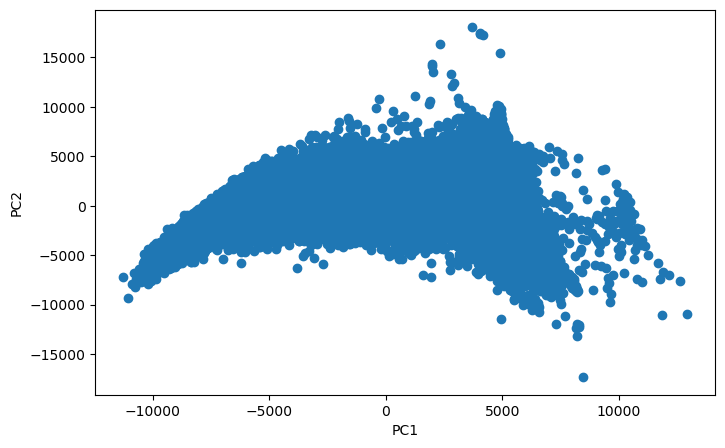

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'Second Principal Component')

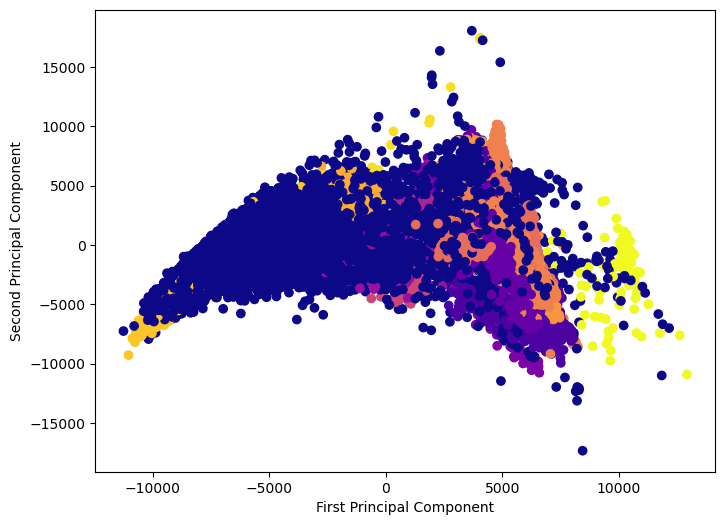

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<AxesSubplot:>

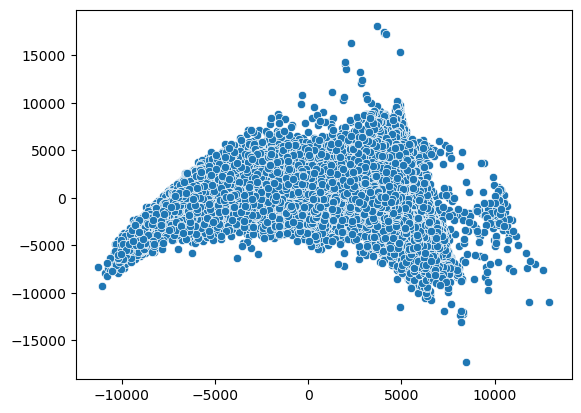

In [47]:
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1])

<AxesSubplot:>

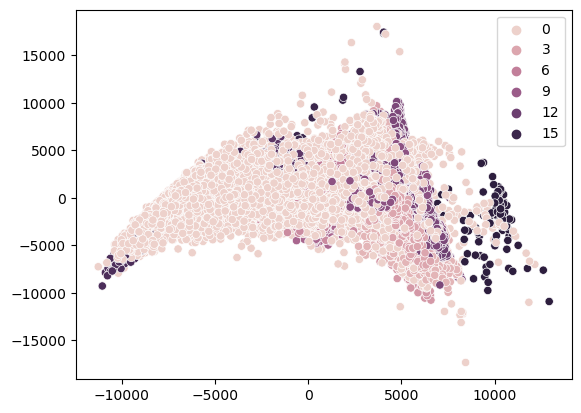

In [48]:
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1],hue=target)

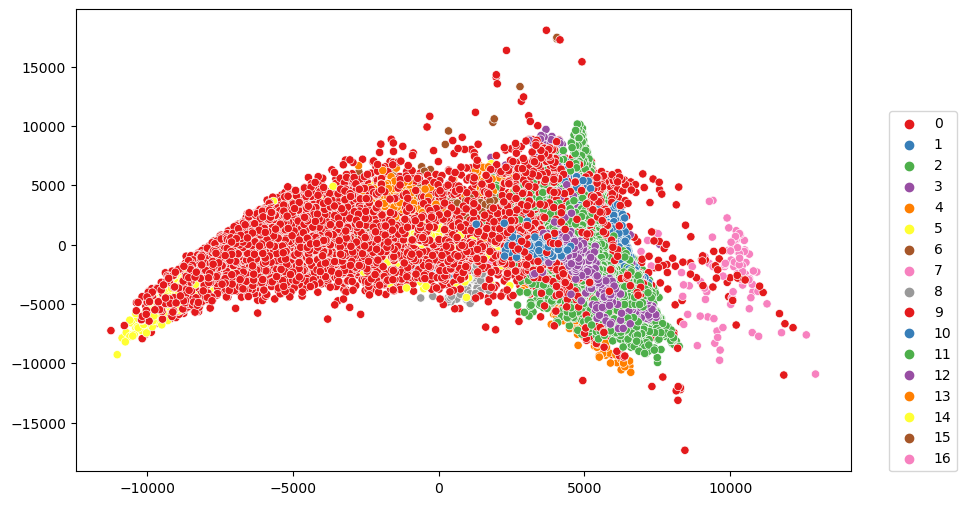

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1],hue=target,palette='Set1')
plt.legend(loc=(1.05,0))

# KNN Implementation

In [50]:
name = list()
for i in range (x_pca.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [51]:
df = pd.DataFrame(data = x_pca,columns=name)
df

PC1          PC2         PC3         PC4         PC5  \
0      4815.623760  1669.133437  112.562264 -226.024227  -52.779568   
1      5338.893731 -1892.484350  540.735016 -179.675640  136.063395   
2      5530.420019 -2971.109853  603.055291 -174.276084   73.575274   
3      5324.553566 -2245.995653  550.331614 -175.131843   73.214803   
4      4763.780147   454.323928   92.985189 -179.776334  -82.170140   
...            ...          ...         ...         ...         ...   
21020 -7554.689866 -1541.397976  331.382624  -84.248013 -417.079075   
21021 -7745.890334 -1661.726883  367.177302 -164.646216 -604.817304   
21022 -7332.638799  -931.188929  357.977652 -161.124300 -408.376476   
21023 -6393.765861   964.920627  537.399264 -170.650809 -578.917720   
21024 -6569.807177   557.058792  328.249970  -20.350981 -628.351645   

              PC6         PC7         PC8         PC9        PC10  
0      -84.974139  229.299837   69.401610   23.714403   77.244740  
1     -169.949911   94.494190   14.128247    5.857870   -7.476839  
2     -124.225567 -194.726258   72.184775  -33.078203 -151.799919  
3      -18.351271  -20.370909   74.547259  -15.527945    7.762210  
4       61.531775  -69.275046  217.284252  -47.142050  205.937662  
...           ...         ...         ...         ...         ...  
21020  166.392946  -15.650576  -57.740079 -138.643149  -55.450265  
21021  217.529046 -143.076977 -119.195914 -153.558554 -155.623044  
21022  219.442394  168.856471   49.630905 -247.195454  165.294078  
21023   11.981695  106.196477 -186.724970  -76.842057   13.203830  
21024 -134.929681  -82.950838   94.520763   43.371774   69.598559  

[21025 rows x 10 columns]

In [52]:
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [53]:
df['target'] = target
df

PC1          PC2         PC3         PC4         PC5  \
0      4815.623760  1669.133437  112.562264 -226.024227  -52.779568   
1      5338.893731 -1892.484350  540.735016 -179.675640  136.063395   
2      5530.420019 -2971.109853  603.055291 -174.276084   73.575274   
3      5324.553566 -2245.995653  550.331614 -175.131843   73.214803   
4      4763.780147   454.323928   92.985189 -179.776334  -82.170140   
...            ...          ...         ...         ...         ...   
21020 -7554.689866 -1541.397976  331.382624  -84.248013 -417.079075   
21021 -7745.890334 -1661.726883  367.177302 -164.646216 -604.817304   
21022 -7332.638799  -931.188929  357.977652 -161.124300 -408.376476   
21023 -6393.765861   964.920627  537.399264 -170.650809 -578.917720   
21024 -6569.807177   557.058792  328.249970  -20.350981 -628.351645   

              PC6         PC7         PC8         PC9        PC10  target  
0      -84.974139  229.299837   69.401610   23.714403   77.244740       3  
1     -169.949911   94.494190   14.128247    5.857870   -7.476839       3  
2     -124.225567 -194.726258   72.184775  -33.078203 -151.799919       3  
3      -18.351271  -20.370909   74.547259  -15.527945    7.762210       3  
4       61.531775  -69.275046  217.284252  -47.142050  205.937662       3  
...           ...         ...         ...         ...         ...     ...  
21020  166.392946  -15.650576  -57.740079 -138.643149  -55.450265       0  
21021  217.529046 -143.076977 -119.195914 -153.558554 -155.623044       0  
21022  219.442394  168.856471   49.630905 -247.195454  165.294078       0  
21023   11.981695  106.196477 -186.724970  -76.842057   13.203830       0  
21024 -134.929681  -82.950838   94.520763   43.371774   69.598559       0  

[21025 rows x 11 columns]

In [54]:
n = len(df.columns)
n

11

## Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = df.drop(df.columns[n-1],axis=1)
X

PC1          PC2         PC3         PC4         PC5  \
0      4815.623760  1669.133437  112.562264 -226.024227  -52.779568   
1      5338.893731 -1892.484350  540.735016 -179.675640  136.063395   
2      5530.420019 -2971.109853  603.055291 -174.276084   73.575274   
3      5324.553566 -2245.995653  550.331614 -175.131843   73.214803   
4      4763.780147   454.323928   92.985189 -179.776334  -82.170140   
...            ...          ...         ...         ...         ...   
21020 -7554.689866 -1541.397976  331.382624  -84.248013 -417.079075   
21021 -7745.890334 -1661.726883  367.177302 -164.646216 -604.817304   
21022 -7332.638799  -931.188929  357.977652 -161.124300 -408.376476   
21023 -6393.765861   964.920627  537.399264 -170.650809 -578.917720   
21024 -6569.807177   557.058792  328.249970  -20.350981 -628.351645   

              PC6         PC7         PC8         PC9        PC10  
0      -84.974139  229.299837   69.401610   23.714403   77.244740  
1     -169.949911   94.494190   14.128247    5.857870   -7.476839  
2     -124.225567 -194.726258   72.184775  -33.078203 -151.799919  
3      -18.351271  -20.370909   74.547259  -15.527945    7.762210  
4       61.531775  -69.275046  217.284252  -47.142050  205.937662  
...           ...         ...         ...         ...         ...  
21020  166.392946  -15.650576  -57.740079 -138.643149  -55.450265  
21021  217.529046 -143.076977 -119.195914 -153.558554 -155.623044  
21022  219.442394  168.856471   49.630905 -247.195454  165.294078  
21023   11.981695  106.196477 -186.724970  -76.842057   13.203830  
21024 -134.929681  -82.950838   94.520763   43.371774   69.598559  

[21025 rows x 10 columns]

In [57]:
y = df[df.columns[n-1]]
y

0        3
1        3
2        3
3        3
4        3
        ..
21020    0
21021    0
21022    0
21023    0
21024    0
Name: target, Length: 21025, dtype: int8

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [59]:
X_train

PC1          PC2          PC3         PC4         PC5  \
11564  1614.971021  -807.212391  -977.164957  631.425849   -6.352754   
6824   5496.760954 -7885.530142   284.049597 -184.812487  156.840858   
13573  -653.301239   622.459478  -709.584176  172.469442  227.474827   
6494   3105.132466  3147.573792  -920.377356  -74.791647  -92.224612   
15613 -8932.540116 -3889.557084    81.646199 -198.818970   45.071009   
...            ...          ...          ...         ...         ...   
11284 -4085.570475  1089.625133   -83.937327  287.802091  -87.089819   
11964  4671.166225 -3786.864352   -16.079224   -9.132267   44.407758   
5390   5084.814284 -2693.103437   723.770576  176.676558 -149.950448   
860    6252.262816 -2856.039249  -277.200530   99.042728 -254.351484   
15795 -1733.737725  1271.973755  1358.394680  132.191062  -72.920061   

              PC6         PC7         PC8         PC9        PC10  
11564  -84.036973 -135.750343    4.785996 -126.752004  -52.090784  
6824  -166.639303  332.124054 -143.181538   -3.811128  139.438928  
13573 -106.903320  230.945041 -258.857918  -61.118562 -109.819398  
6494   382.954261  -82.762311  -53.640734    5.186159 -140.998613  
15613  136.987424   50.307600  -99.175007  107.722034   -1.949105  
...           ...         ...         ...         ...         ...  
11284 -150.148632 -136.099540  -43.419882   60.901334  -69.013063  
11964   11.100117  170.508783  123.598297   55.970877 -115.873933  
5390  -177.797565  394.551840  203.910700  115.725044  -55.023976  
860    180.227113  -91.265642  105.681176  -73.006329  171.331023  
15795   24.505004   54.350811   47.189063   -2.554736 -212.238140  

[14717 rows x 10 columns]

In [60]:
X_test

PC1          PC2          PC3         PC4         PC5  \
18460  5734.944124 -3061.371627   194.720896 -380.304159  147.416284   
8260    327.259731 -1785.513423 -1589.935779  990.019303 -176.088497   
4741  -6365.105190   493.886511   442.905943   49.660396 -541.744761   
10117  -241.179416  2133.930680   201.380497  407.426440   84.895767   
10596 -8677.978236 -3471.263200   559.460487 -335.132271 -466.408377   
...            ...          ...          ...         ...         ...   
5248   6379.809489 -3856.946413   118.981181  -69.674628 -220.182964   
4455  -6592.856472   323.880395   309.630701 -137.538886 -383.137627   
9418  -1760.981373 -1270.781246  -745.530872  943.119988  146.924879   
9185   6413.212563 -3417.675219  -129.364431 -232.971302  -19.783480   
435    4735.654018  4183.433745   -74.767806 -322.557760   45.268347   

              PC6         PC7         PC8         PC9        PC10  
18460  -93.365413  113.075864  -82.065333  -27.866463   -9.578035  
8260  -159.251485 -147.837130    6.488218   21.661801  -56.261297  
4741  -160.095034 -291.081367  103.468559  210.150588  -38.359333  
10117   56.316769 -403.254766 -164.487728  -17.382071   -0.383831  
10596  -29.248003 -134.753610  -26.004581  242.045048   82.582709  
...           ...         ...         ...         ...         ...  
5248   -43.873129 -102.196578   53.136965    5.506889 -184.629762  
4455   -56.721658  240.839601 -120.023418  -98.711552   14.384072  
9418  -331.037427 -312.855168  -37.196244  -54.074388  125.419490  
9185  -221.687785  106.081681  175.557950  -58.015611   -3.830163  
435   -161.214322  305.229148   89.520508   72.335421  101.812115  

[6308 rows x 10 columns]

## Finding the Best Value of K

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [62]:
k = math.floor(math.sqrt(len(y_train)))

if k%2==0 :
    k = k + 1

print(k)

121


In [63]:
k_value = k

In [64]:
k_list = list()
accuracy_list = list()

for k in range(k_value):
    k = k + 1
    k_list.append(k)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred) * 100
    accuracy_list.append(accuracy)

Text(0, 0.5, 'Accuracy')

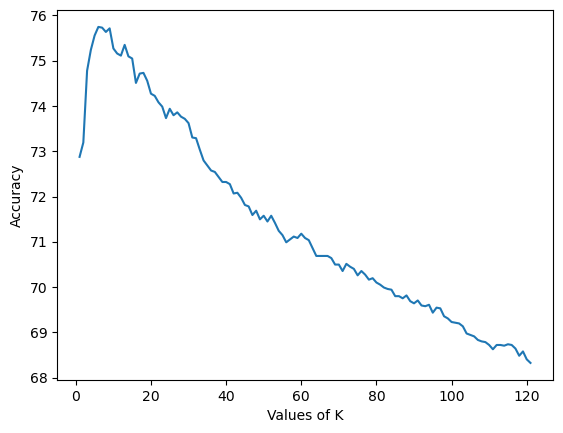

In [65]:
plt.plot(k_list,accuracy_list)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')

In [66]:
max_accuracy = 0

for k in range(k_value):
    if accuracy_list[k] > max_accuracy:
        max_accuracy = accuracy_list[k]
        k_best = k_list[k]

print('Maximum Accuracy :',max_accuracy)
print('Best value of K :',k_best)

Maximum Accuracy : 75.74508560558021
Best value of K : 6


In [67]:
max_accuracy = max(accuracy_list)
print(max_accuracy)
max_index = accuracy_list.index(max(accuracy_list))
print(max_index)

k_best = k_list[max_index]
print(k_best)

75.74508560558021
5
6
